<a href="https://colab.research.google.com/github/osvaldofacundo/proyectowebscraping/blob/main/proyectowebscraping%2Banalisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import plotly.express as px

In [2]:
webpage= requests.get("https://footballdatabase.com/league-scores-tables/argentina-primera-division-2022")
soup = BeautifulSoup(webpage.content, "html.parser")

In [3]:
soup.find(id='total')
liga= soup.find_all(id='total') # identificamos la tabla y buscams y extraemos ella del codigo html
#soup.find('div')

In [4]:
liga= str(liga) # transformamos a str la tabla

In [5]:
liga= re.sub(r'<.*?>', lambda g: g.group(0).upper(), liga) #cambiamos a mayusculas
liga

'[<DIV CLASS="TAB-PANE FADE IN ACTIVE" ID="TOTAL"><DIV CLASS="TABLE-RESPONSIVE">\n<TABLE CLASS="TABLE TABLE-HOVER TABLE-CONDENSED">\n<THEAD>\n<TR><TH>#</TH><TH CLASS="TEXT-LEFT" STYLE="WIDTH:35%;">Club</TH><TH><ABBR TITLE="POINTS">P</ABBR></TH><TH><ABBR TITLE="GOAL DIFFERENCE">+/-</ABBR></TH><TH><ABBR TITLE="MATCHES PLAYED">M</ABBR></TH><TH><ABBR TITLE="WON">W</ABBR></TH><TH><ABBR TITLE="DRAWN">D</ABBR></TH><TH><ABBR TITLE="LOST">L</ABBR></TH><TH><ABBR TITLE="GOALS FOR">F</ABBR></TH><TH CLASS="DIVISION"><ABBR TITLE="GOALS AGAINST">A</ABBR></TH></TR>\n</THEAD>\n<TBODY>\n<TR><TD>1</TD><TD><A CLASS="SM_LOGO-NAME" HREF="/CLUBS-RANKING/ATLETICO-TUCUMAN" STYLE="BACKGROUND-IMAGE: URL(/LOGOS/CLUB/20PX/1269.PNG);" TITLE="">Atlético Tucumán</A></TD><TD>34</TD><TD>11</TD><TD>18</TD><TD>9</TD><TD>7</TD><TD>2</TD><TD>20</TD><TD>9</TD></TR><TR><TD>2</TD><TD><A CLASS="SM_LOGO-NAME" HREF="/CLUBS-RANKING/GIMNASIA-LA-PLATA" STYLE="BACKGROUND-IMAGE: URL(/LOGOS/CLUB/20PX/395.PNG);" TITLE="">Gimnasia y Esg

In [6]:
df = pd.read_html(liga)[0]
df

,#,Club,P,+/-,M,W,D,L,F,A
0,1,Atlético Tucumán,34,11,18,9,7,2,20,9
1,2,Gimnasia y Esgrima La Plata,33,9,18,9,6,3,19,10
2,3,Huracán,32,9,18,8,8,2,22,13
3,4,Boca Juniors,32,2,18,10,2,6,24,22
4,5,Godoy Cruz Antonio Tomba,31,4,18,9,4,5,21,17
5,6,Argentinos Juniors,30,4,18,9,3,6,20,16
6,7,River Plate,29,12,18,8,5,5,27,15
7,8,Racing Club,28,9,18,7,7,4,24,15
8,9,Patronato de Parana,27,4,18,7,6,5,23,19
9,10,San Lorenzo de Almagro,26,5,18,5,11,2,23,18


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
#,28.0,14.500000,8.225975,1.0,7.75,14.5,21.25,28.0
P,28.0,23.785714,6.355850,11.0,19.75,24.5,28.25,34.0
+/-,28.0,0.000000,6.847546,-17.0,-4.00,-0.5,4.00,12.0
M,28.0,17.857143,0.448395,16.0,18.00,18.0,18.00,18.0
W,28.0,5.928571,2.340126,1.0,4.00,6.0,7.25,10.0
D,28.0,6.000000,2.260777,2.0,4.75,6.0,7.00,11.0
L,28.0,5.928571,2.371569,2.0,4.75,6.0,7.25,11.0
F,28.0,19.071429,3.962122,11.0,17.00,19.0,22.00,27.0
A,28.0,19.071429,4.936100,9.0,16.00,18.0,22.00,28.0


In [8]:
df.describe(include='O').T

,count,unique,top,freq
Club,28,28,Atlético Tucumán,1


In [9]:
df.set_index('#')

,Club,P,+/-,M,W,D,L,F,A
#,,,,,,,,,
1,Atlético Tucumán,34,11,18,9,7,2,20,9
2,Gimnasia y Esgrima La Plata,33,9,18,9,6,3,19,10
3,Huracán,32,9,18,8,8,2,22,13
4,Boca Juniors,32,2,18,10,2,6,24,22
5,Godoy Cruz Antonio Tomba,31,4,18,9,4,5,21,17
6,Argentinos Juniors,30,4,18,9,3,6,20,16
7,River Plate,29,12,18,8,5,5,27,15
8,Racing Club,28,9,18,7,7,4,24,15
9,Patronato de Parana,27,4,18,7,6,5,23,19


In [10]:
df.to_csv('liga_arg_2022.csv', encoding='utf-8')

In [11]:
df= df.rename(columns={'#':'Posición', 'P': 'PUNTOS', '+/-': 'DIF GOL','M':'PARTIDOS JUGADOS','W':'GANADOS',
                       'D':'EMPATES','L':'PERDIDOS','F':'GOLES A FAVOR','A':'GOLES ENCONTRA'})
df            

,Posición,Club,PUNTOS,DIF GOL,PARTIDOS JUGADOS,GANADOS,EMPATES,PERDIDOS,GOLES A FAVOR,GOLES ENCONTRA
0,1,Atlético Tucumán,34,11,18,9,7,2,20,9
1,2,Gimnasia y Esgrima La Plata,33,9,18,9,6,3,19,10
2,3,Huracán,32,9,18,8,8,2,22,13
3,4,Boca Juniors,32,2,18,10,2,6,24,22
4,5,Godoy Cruz Antonio Tomba,31,4,18,9,4,5,21,17
5,6,Argentinos Juniors,30,4,18,9,3,6,20,16
6,7,River Plate,29,12,18,8,5,5,27,15
7,8,Racing Club,28,9,18,7,7,4,24,15
8,9,Patronato de Parana,27,4,18,7,6,5,23,19
9,10,San Lorenzo de Almagro,26,5,18,5,11,2,23,18


In [12]:
#df= df.set_index('Posición')

In [13]:
df

,Posición,Club,PUNTOS,DIF GOL,PARTIDOS JUGADOS,GANADOS,EMPATES,PERDIDOS,GOLES A FAVOR,GOLES ENCONTRA
0,1,Atlético Tucumán,34,11,18,9,7,2,20,9
1,2,Gimnasia y Esgrima La Plata,33,9,18,9,6,3,19,10
2,3,Huracán,32,9,18,8,8,2,22,13
3,4,Boca Juniors,32,2,18,10,2,6,24,22
4,5,Godoy Cruz Antonio Tomba,31,4,18,9,4,5,21,17
5,6,Argentinos Juniors,30,4,18,9,3,6,20,16
6,7,River Plate,29,12,18,8,5,5,27,15
7,8,Racing Club,28,9,18,7,7,4,24,15
8,9,Patronato de Parana,27,4,18,7,6,5,23,19
9,10,San Lorenzo de Almagro,26,5,18,5,11,2,23,18


In [14]:
df.to_csv('liga_arg_2022.csv', encoding='utf-8')

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import plotly.express as px

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Posición          28 non-null     int64 
 1   Club              28 non-null     object
 2   PUNTOS            28 non-null     int64 
 3   DIF GOL           28 non-null     int64 
 4   PARTIDOS JUGADOS  28 non-null     int64 
 5   GANADOS           28 non-null     int64 
 6   EMPATES           28 non-null     int64 
 7   PERDIDOS          28 non-null     int64 
 8   GOLES A FAVOR     28 non-null     int64 
 9   GOLES ENCONTRA    28 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 2.3+ KB


Salvo el nombre de los clubes el resto de los datos es int64
No hay nulos

Variable PUNTOS

In [17]:
df.PUNTOS.describe()

count    28.000000
mean     23.785714
std       6.355850
min      11.000000
25%      19.750000
50%      24.500000
75%      28.250000
max      34.000000
Name: PUNTOS, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


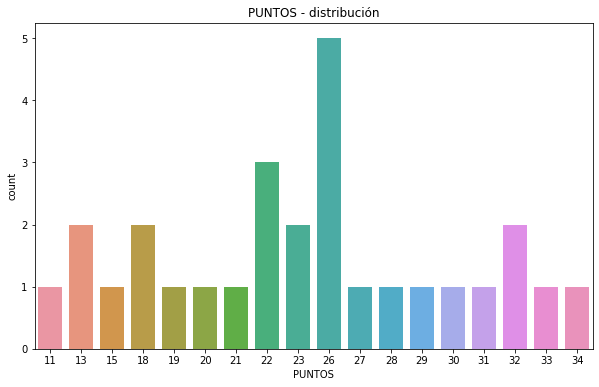

In [18]:
plt.figure(figsize = (10,6))
rc= sns.countplot(df['PUNTOS'])
rc.set_title('PUNTOS - distribución');

In [19]:
frec = df["PUNTOS"].value_counts() #conteo por cada valor, será la frecuencia
frec_df = pd.DataFrame(frec) #creamos un dataframe con los datos de la frecuencia 
frec_df.rename(columns={'PUNTOS':'Frec_abs'},inplace=True) #reemplazamos el nombre de la columna para la frencuencia abosluta



#Obtenemos los valores de las Frecuencias Absolutas
Frec_abs_val = frec_df["Frec_abs"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias absolutas acumuladas
acum = []

#Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias absolutas para irlas sumando
for i in Frec_abs_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_abs_acum"] = acum


#Calculamos la Frecuencia Relativa en %
frec_df["frec_rel_%"] = round(100 * frec_df["Frec_abs"]/len(df.PUNTOS),4)


#Obtenemos las Frecuencias Relativas
Frec_rel_val = frec_df["frec_rel_%"].values

#Creamos una lista sin datos en donde vamos a guardar las frecuencias relativas acumuladas
acum = []

# variable  en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias relativas para irlas sumando
for i in Frec_rel_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_rel_%_acum"] = acum
frec_df


,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
26,5,5,17.8571,17.8571
22,3,8,10.7143,28.5714
23,2,10,7.1429,35.7143
32,2,12,7.1429,42.8572
13,2,14,7.1429,50.0001
18,2,16,7.1429,57.1430
15,1,17,3.5714,60.7144
19,1,18,3.5714,64.2858
20,1,19,3.5714,67.8572
21,1,20,3.5714,71.4286


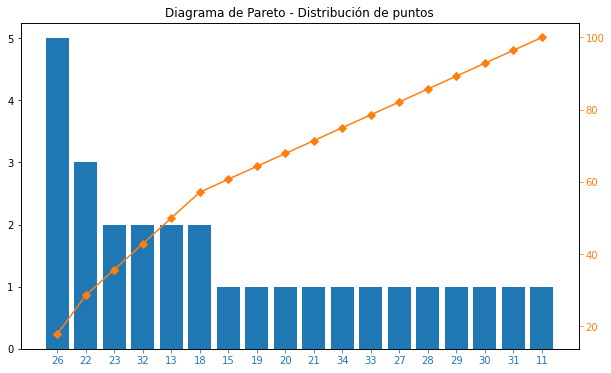

In [20]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(1,1,1)

ax.set_title ('Diagrama de Pareto - Distribución de puntos')

ax.bar(frec_df.index.astype(str), frec_df['Frec_abs'], color ="C0")

ax2 = ax.twinx()
ax2.plot(frec_df.index.astype(str), frec_df['frec_rel_%_acum'], color = "C1", marker = "D", ms = 5)

ax.tick_params(axis="x", colors="C0")
ax2.tick_params(axis="y", colors= "C1")


plt.show()

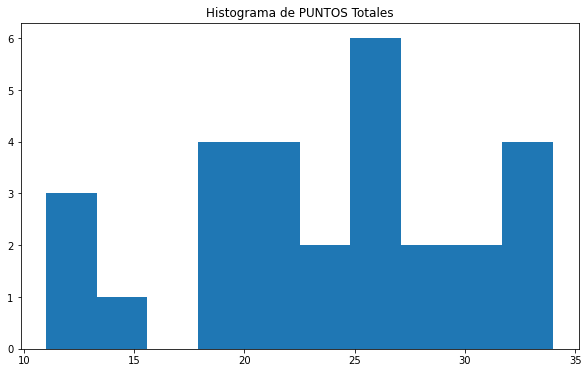

In [21]:
plt.figure(figsize = (10,6))
plt.hist(df['PUNTOS']) #histograma de goels totales por partido
plt.title("Histograma de PUNTOS Totales");

CORRELACIÓN ENTRE VARIABLES.-

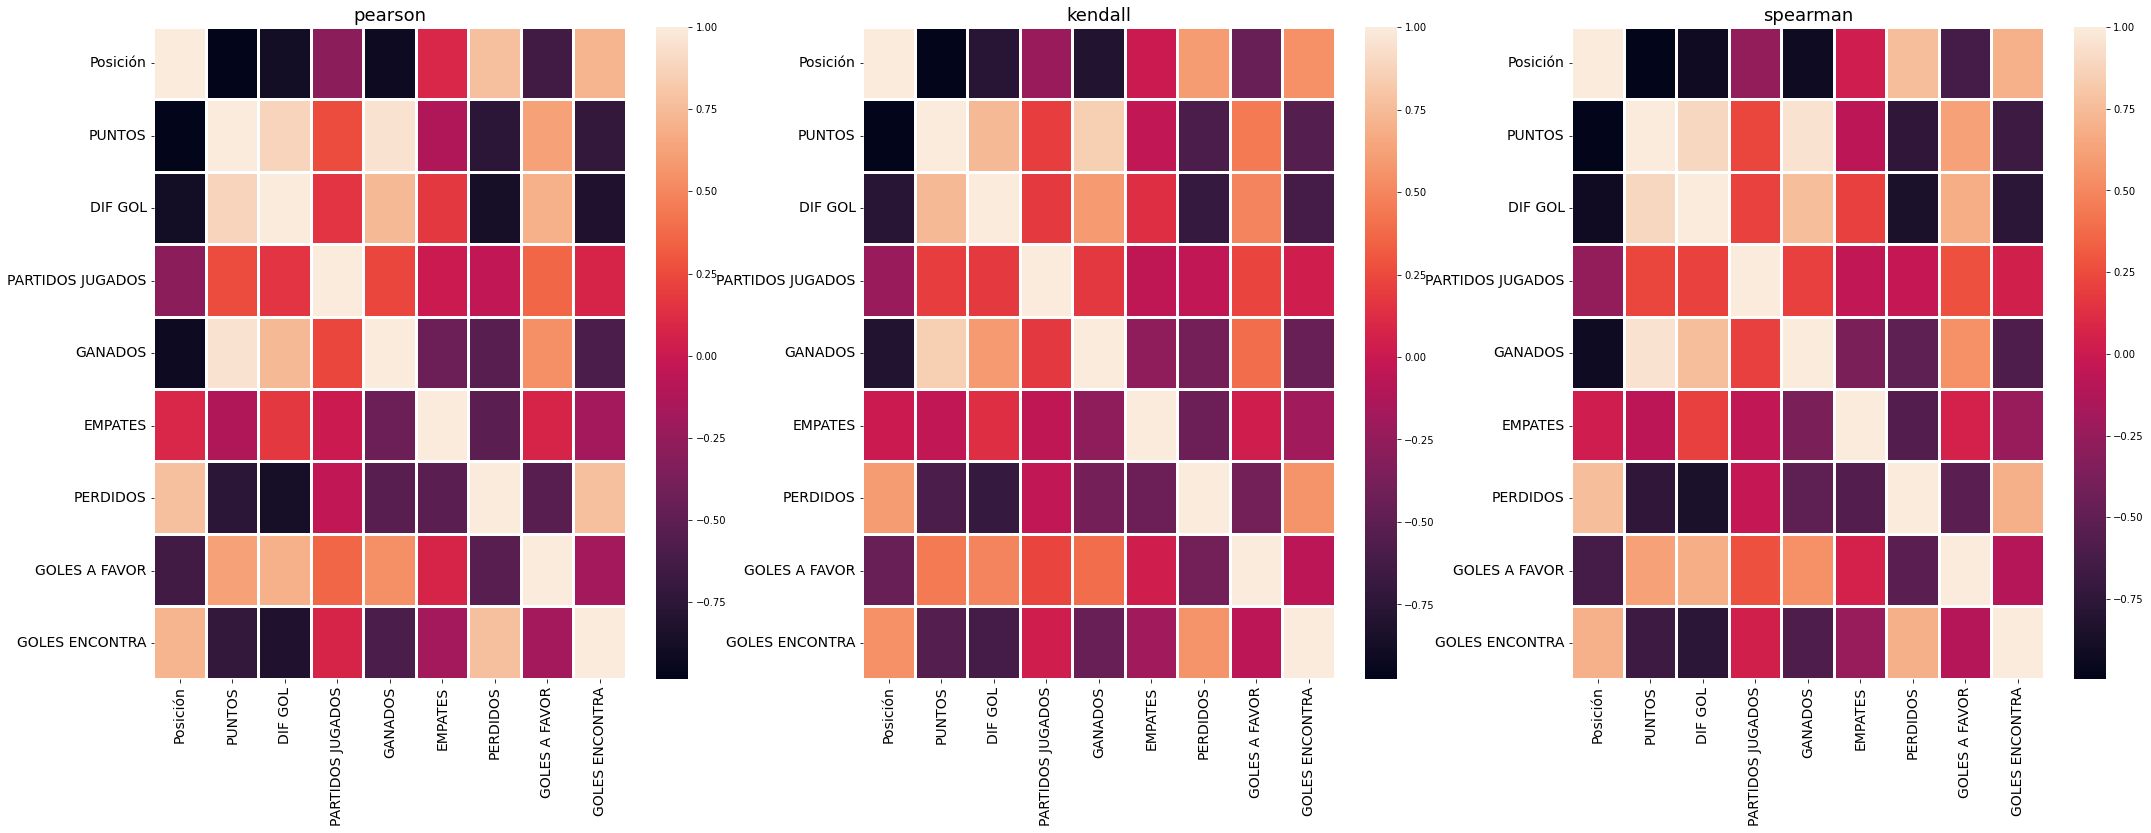

In [22]:
plt.figure(figsize=(36,12))
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = df.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)
  plt.yticks(fontsize=14)
  plt.xticks(fontsize=14)

In [23]:
def corrFilter(x: pd.DataFrame, thres: float):
    #generate corr 
    xCorr = x.corr('spearman')
    #filter corr by thres
    xFiltered = xCorr[((xCorr >= thres) | (xCorr <= -thres)) & (xCorr !=1.000)]
    #change dataframe format
    xFlattened = xFiltered.unstack().drop_duplicates().reset_index().sort_values(0, ascending= False).dropna()
    #rename columns
    xFlattened.columns = ['Variable_1', 'Variable_2', 'corr_value']
    return xFlattened

print('tabla de correlaciones mayores a 0.7')
corrFilter(df, .7)

tabla de correlaciones mayores a 0.7


,Variable_1,Variable_2,corr_value
6,PUNTOS,GANADOS,0.947358
5,PUNTOS,DIF GOL,0.892670
4,Posición,PERDIDOS,0.764913
8,DIF GOL,GANADOS,0.761746
7,PUNTOS,PERDIDOS,-0.740645
10,DIF GOL,GOLES ENCONTRA,-0.766420
9,DIF GOL,PERDIDOS,-0.850747
2,Posición,DIF GOL,-0.913811
3,Posición,GANADOS,-0.925363
1,Posición,PUNTOS,-0.996161


GRAFICAMOS LAS VARIABLES CON MAYOR CORRELACIÓN

Text(0.5, 1.02, 'Grafico variables númericas con mayor correlación')

<Figure size 1008x1008 with 0 Axes>

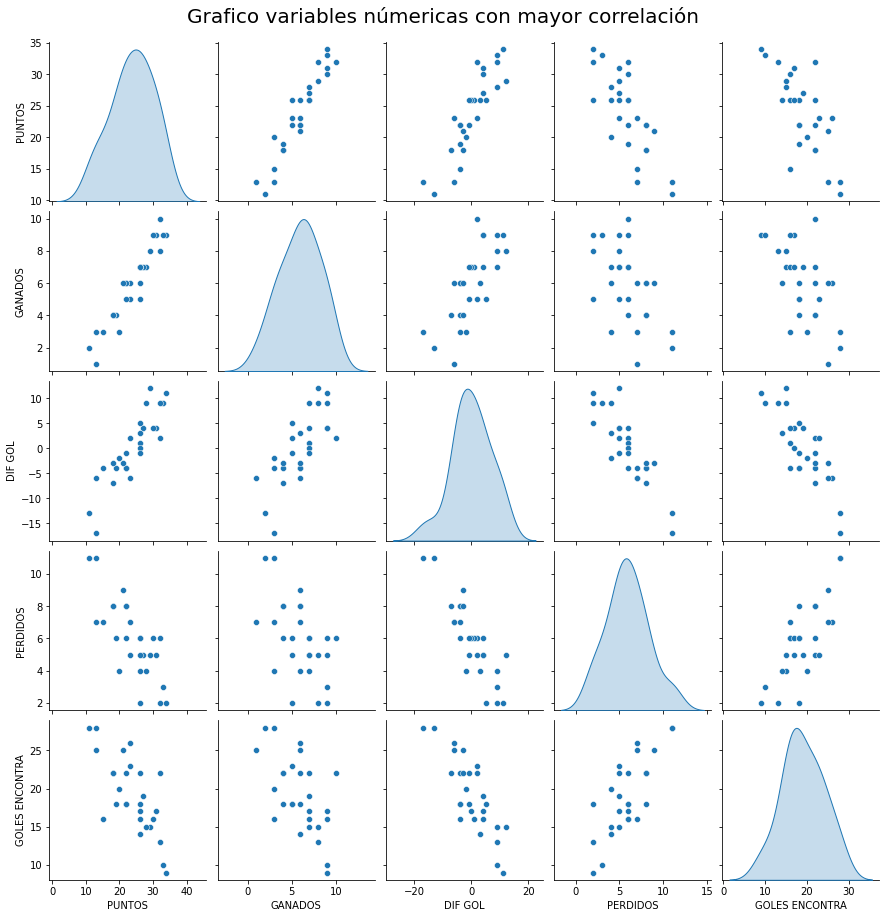

In [24]:
plt.figure(figsize=(14, 14))

g = sns.pairplot(df[['PUNTOS', 'GANADOS', 'DIF GOL', 'PERDIDOS', 'GOLES ENCONTRA']], diag_kind='kde');
g.fig.suptitle("Grafico variables númericas con mayor correlación", fontsize=20, y=1.02)

PARTIDOS GANADOS - DIFERENCIA DE GOL

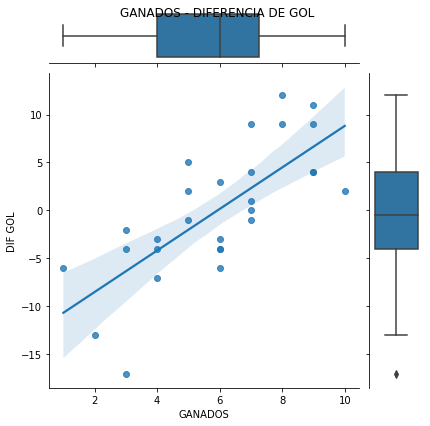

In [25]:
g = sns.JointGrid(data=df, x="GANADOS", y="DIF GOL")
g.plot(sns.regplot, sns.boxplot)
g.fig.suptitle("GANADOS - DIFERENCIA DE GOL");

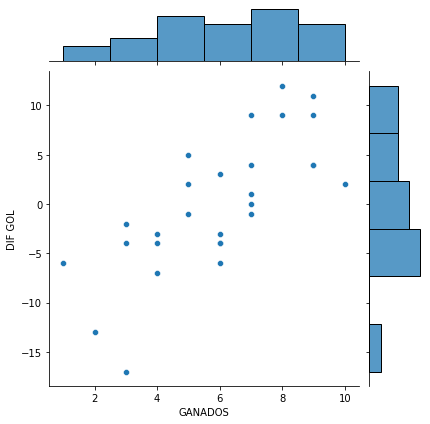

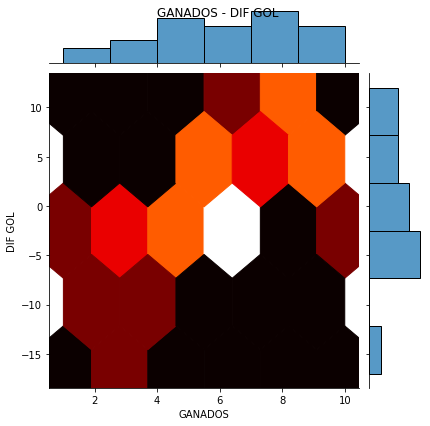

In [26]:
#grafico usando un scatterplot y histrograma 
gh = sns.jointplot(x = 'GANADOS', y= 'DIF GOL', data=df)
gh = sns.jointplot(x = 'GANADOS', y= 'DIF GOL', data=df, kind='hex', cmap='hot')
gh.fig.suptitle("GANADOS - DIF GOL");

PUNTOS Y DIFERENCIA DE GOL

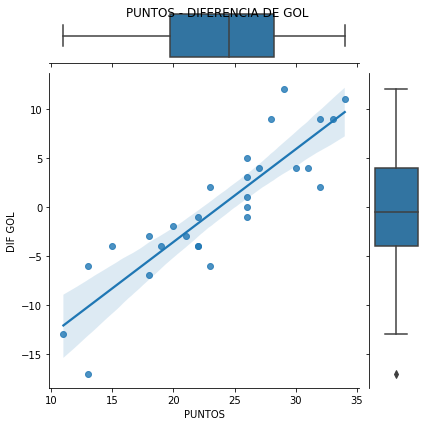

In [27]:
g = sns.JointGrid(data=df, x="PUNTOS", y="DIF GOL")
g.plot(sns.regplot, sns.boxplot)
g.fig.suptitle("PUNTOS - DIFERENCIA DE GOL");

In [28]:
df.columns = df.columns.str.replace(' ', '_')  #REEMPLAZAMOS LOS ESPACIOS POR _ EN LAS COLUMNAS PARA PODER TRABAJAR MEJOR

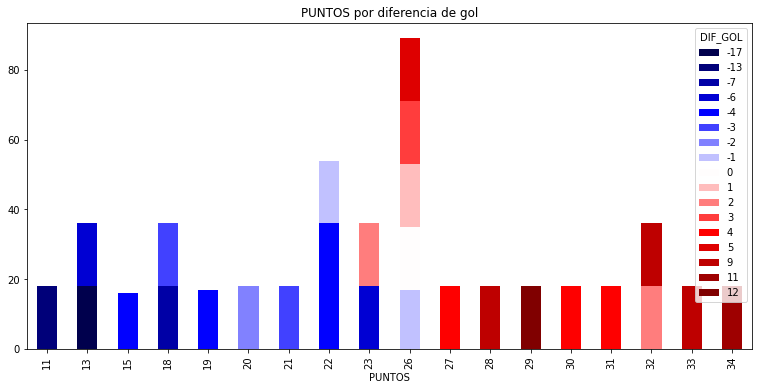

In [29]:
resultgoal = df.groupby(['PUNTOS', 'DIF_GOL' ]).PARTIDOS_JUGADOS.sum()
resultgoal.unstack().plot(kind='bar',stacked=True, colormap= 'seismic', figsize=(13, 6))
plt.title('PUNTOS por diferencia de gol');

Se puede observar la distribución de la diferencia de gol a través de los puntos obtenidos.

PARTIDOS GANADOS- EMPATADOS Y PERDIDOS POR EQUIPO

In [39]:
dfcont = df[['Club','GANADOS', 'EMPATES', 'PERDIDOS']]
dfcont= dfcont.set_index('Club')
dfcont= dfcont.sort_values(by=['GANADOS'], ascending=False) #tabla de contingencia
dfcont

,GANADOS,EMPATES,PERDIDOS
Club,,,
Boca Juniors,10,2,6
Atlético Tucumán,9,7,2
Godoy Cruz Antonio Tomba,9,4,5
Argentinos Juniors,9,3,6
Gimnasia y Esgrima La Plata,9,6,3
Huracán,8,8,2
River Plate,8,5,5
Newell's Old Boys,7,5,6
Unión Santa Fe,7,5,5


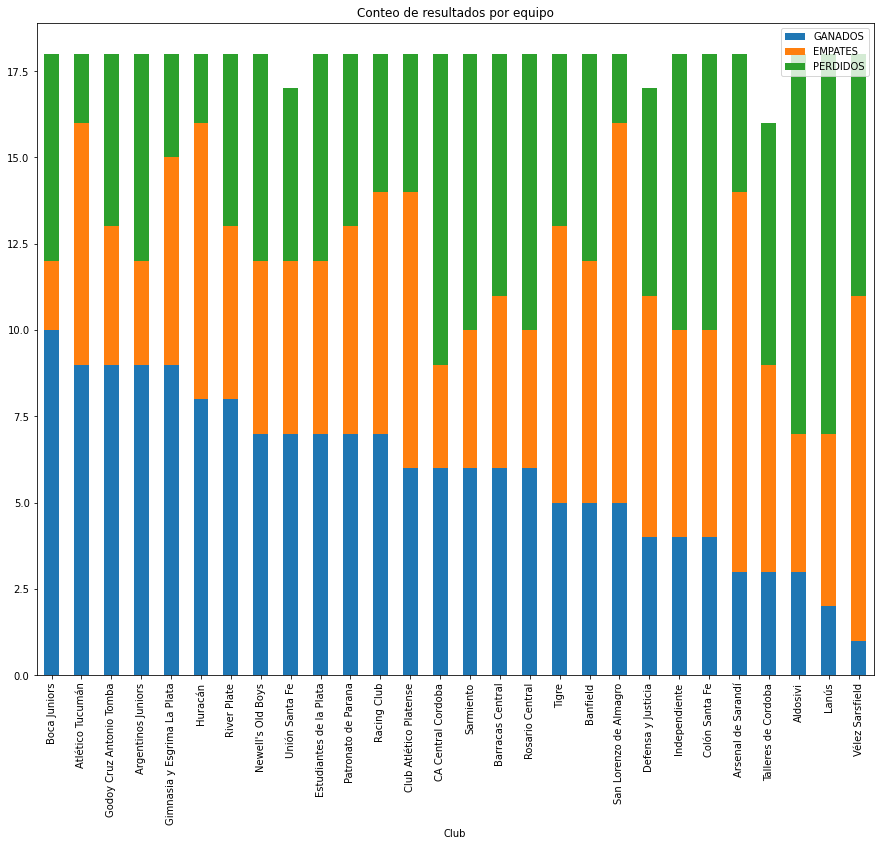

In [40]:
dfcont.plot(kind="bar", stacked=True, rot=0, figsize=(15,12))
plt.xticks(rotation=90)
plt.title('Conteo de resultados por equipo');

In [45]:
fig = px.scatter_3d(df, x="GANADOS", y="EMPATES",z='PERDIDOS',color='Posición', title='Grafico 3d Goles- RESULTADOS_Posición')
fig.show()